# Factors Contributing to the Success of a Movie Analysis

*Is the movie industry dying? What determines the success of a movie?*

## Goal

The goal of this project is to identify the factors that contribute to the success of a movie, specifically whether the production company, the movie's budget, or other variables play a significant role in determining a movie's success. By performing a data analysis using Python, this project aims to provide valuable insights that can help movie production companies make more informed decisions about which movies to produce, which companies to partner with, and how to allocate resources to maximize the chances of success.

## Setup

#### Importing the necessary libraries I will use for this project

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#### Reading the data

In [15]:
df = pd.read_csv(r'/Users/sameerbhatt/Downloads/movies-1.csv')

#### Looking at the data

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [17]:
df.shape

(7668, 15)

## Data Cleaning!

### Checking for missing data

In [18]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


#### Removing null values from the data

In [19]:
df = df.dropna()

In [20]:
df.shape

(5421, 15)

####  Dropping duplicates

In [21]:
df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [22]:
df.shape

(5421, 15)

#### Checking the data type of the columns

In [23]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


#### Changing the data type of columns

In [78]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['correctyear'] = df['released'].str.extract(r'(\d{4})')

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,original_genre,genre_codes,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Drama,6,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Adventure,1,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Action,0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Comedy,4,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Comedy,4,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Drama,6,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Comedy,4,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Drama,6,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Drama,6,2020


#### Adding a Month column


In [80]:
import calendar

df['correctmonth'] = df['released'].str.extract(r'^([A-Za-z]+)').iloc[:, 0]\
    .map(lambda x: list(calendar.month_name).index(x) if pd.notnull(x) else None)


df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,original_genre,genre_codes,correctyear,correctmonth
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Drama,6,1980,6.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,Adventure,1,1980,7.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Action,0,1980,6.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Comedy,4,1980,7.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Comedy,4,1980,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Drama,6,2020,10.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Comedy,4,2020,2.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Drama,6,2020,4.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Drama,6,2020,10.0


#### Ordering the Data

In [30]:
df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,month_name,correctmonth
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009,December,12.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,April,4.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997,December,12.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015,December,12.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,April,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015,January,1.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,1994,June,6.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001,May,5.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982,March,3.0


#### Checking for Outliers

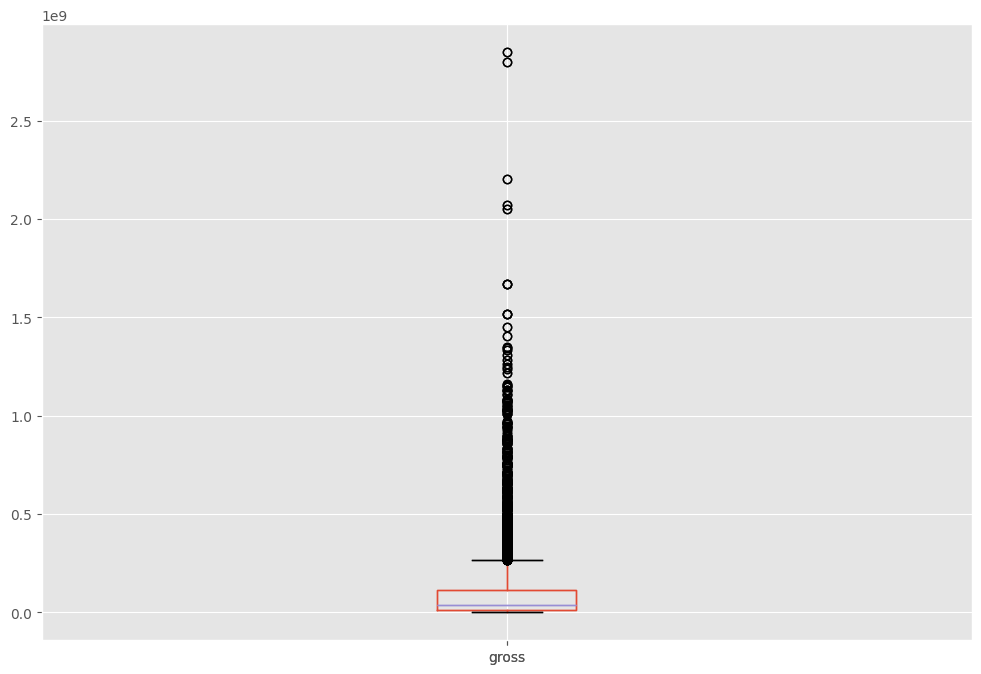

In [32]:
df.boxplot(column=['gross'])
plt.show()


#### Removing Outliers

In [33]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

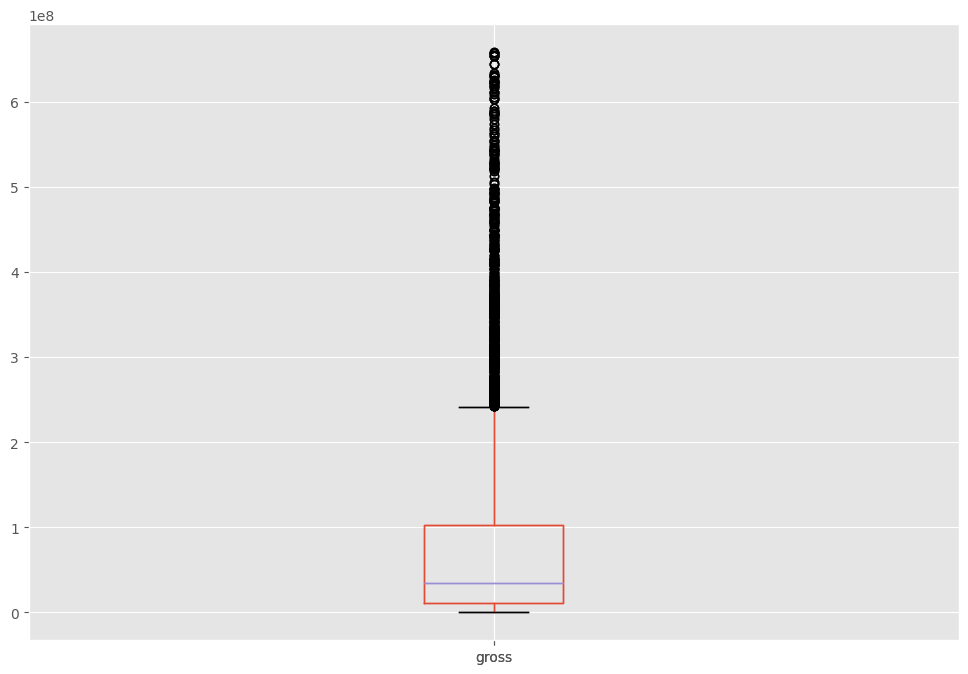

In [35]:
df.boxplot(column=['gross'])
plt.show()

## Data Exploration!

In my analysis, I explored and answered the correlation of a movie's success to key factors in its creation such as budget, company, genre, etc..



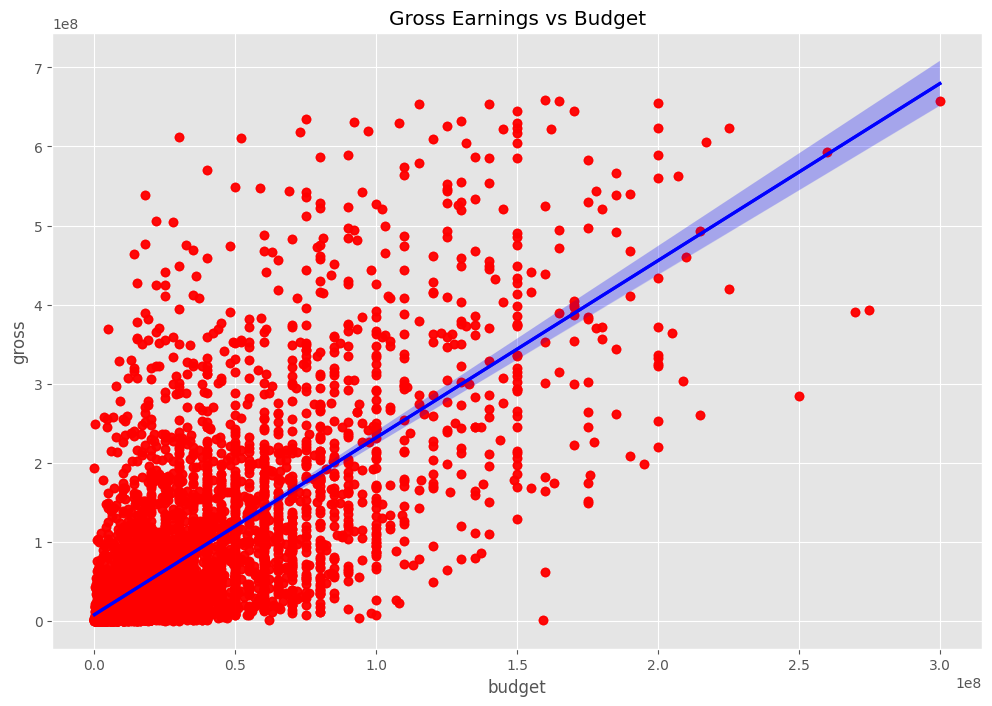

In [37]:
# Looking at correlation

sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Gross Earnings vs Budget')
plt.show()

From this graph, we can determine that there is a significant relationship between the budget and gross earnings of a movie.

### Correlation Matrix

Let's take a deeper look at the relationship of all the other variables to see what correlates the most to gross earnings.

#### Let's Update all the columns to numeric values
By doing this, we can show the correlation between all the variables and not only the ones with numerical values. This will help us to understand which variables are strongly or weakly correlated with each other. 

In [38]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,month_name,correctmonth
0,4586,6,6,1980,1278,8.4,927000.0,1789,2819,692,46,19000000.0,46998772.0,1418,146.0,0,8,6.0
1,3840,6,1,1980,1111,5.8,65000.0,1573,1151,212,47,4500000.0,58853106.0,448,104.0,0,7,7.0
2,3557,4,0,1980,1333,8.7,1200000.0,755,1807,1148,47,18000000.0,538375067.0,938,124.0,0,8,6.0
3,203,4,4,1980,1111,7.7,221000.0,887,1403,1463,47,3500000.0,83453539.0,1100,88.0,0,7,7.0
4,722,6,4,1980,1152,7.3,108000.0,717,350,269,47,6000000.0,39846344.0,1075,98.0,0,7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,408,6,0,2020,892,6.6,140000.0,16,2377,1800,47,90000000.0,426505244.0,448,124.0,40,5,1.0
7649,3481,4,0,2020,702,6.5,102000.0,850,2296,146,47,85000000.0,319715683.0,1100,99.0,40,3,2.0
7650,1133,4,1,2020,892,5.6,53000.0,1803,2814,1459,47,175000000.0,245487753.0,1389,101.0,40,5,1.0
7651,3889,4,1,2020,747,6.8,42000.0,294,2078,634,6,135000000.0,111105497.0,12,100.0,40,3,2.0


#### Looking at the highest correlation

In [39]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
# A correlation coefficient of .50 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

gross         votes           0.579419
votes         gross           0.579419
gross         budget          0.700497
budget        gross           0.700497
month_name    released        0.986799
released      month_name      0.986799
correctyear   year            0.998689
year          correctyear     0.998689
name          name            1.000000
correctyear   correctyear     1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
month_name    month_name      1.000000
director      director        1.000000
star          star            1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
runtime       runtime         1.000000
writer        writer          1.000000
correctmonth  correctmont

#### Visualizing the data

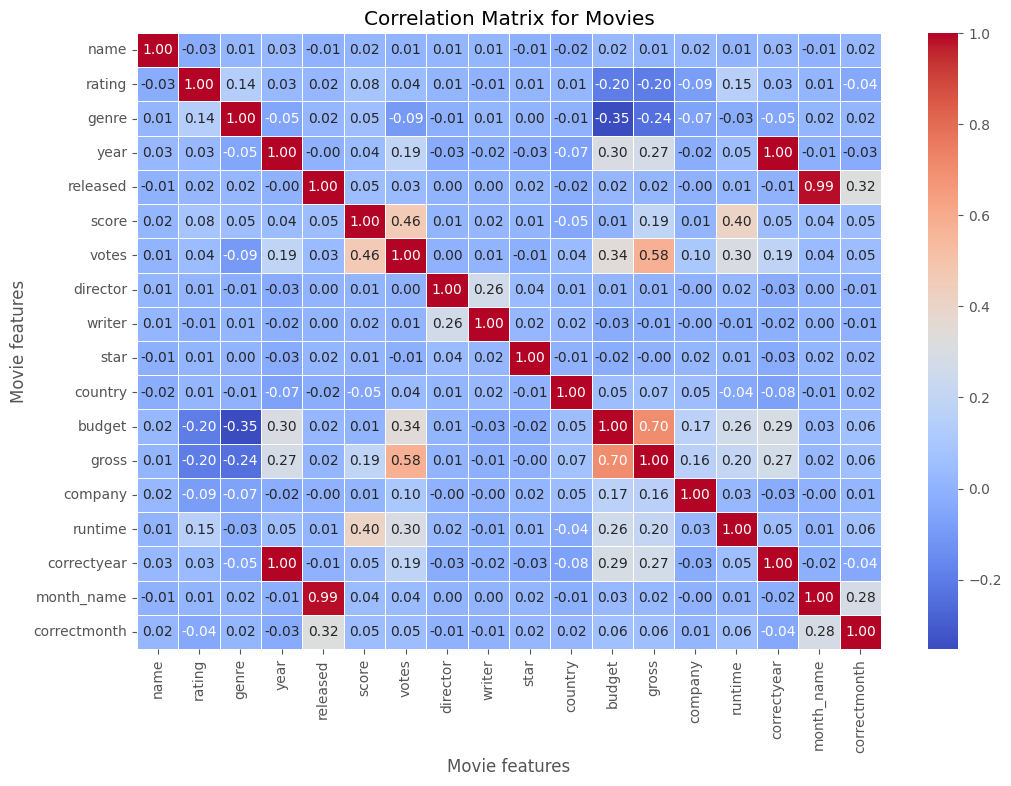

In [41]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

<b>Conclusion:</b> The factors contributing to the success of a movie are votes and budget as they have the highest correlation. It was also determined that the Company, Movie name, Genre had no correlation.

## Data Exploration Continued

While we have determined the factors contributing the most to a movie's success. There are still a few other factors we can explore.

<ul>
    <li>What is the best time of year to release a movie?</li>
    <li>What is the ideal runtime for a movie?</li>
    <li>What genre of movie had the most success on average?</li>
    <li>What genre of movie has the most success overall?</li>
</ul>

### What is the best time of year to release a movie?

*By grouping the Gross Earnings by Month, we can answer this question.*

#### Tabulating the data

In [42]:

df.groupby(['correctmonth']).mean()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear,month_name
correctmonth,,,,,,,,,,,,,,,,,
1.0,2446.101351,5.407658,3.569820,2003.536036,921.738739,6.444369,95197.072072,1110.594595,1655.229730,896.382883,42.056306,2.622468e+07,6.333553e+07,851.873874,109.599099,24.119369,5.0
2.0,2566.486747,5.265060,3.472289,2001.532530,744.587952,6.366747,88642.024096,1056.412048,1644.380723,827.310843,42.207229,2.895267e+07,6.779244e+07,896.597590,107.012048,21.821687,3.0
3.0,2678.981900,5.253394,3.328054,2001.011312,1572.490950,6.314706,93811.846154,1037.115385,1644.244344,981.314480,44.488688,3.255790e+07,7.399234e+07,898.368778,105.823529,21.174208,9.0
4.0,2529.670673,5.305288,3.622596,2001.901442,105.915865,6.232212,71754.634615,1020.665865,1594.627404,935.370192,43.281250,2.425548e+07,5.114678e+07,889.632212,104.588942,22.127404,0.0
5.0,2548.352617,5.206612,3.057851,2000.449036,1774.840220,6.332507,124250.093664,1069.316804,1612.473829,933.542700,43.680441,4.121545e+07,1.147295e+08,918.418733,107.721763,20.608815,10.0
6.0,2739.310345,4.995074,2.812808,2000.591133,1358.812808,6.406897,139995.256158,1081.805419,1603.238916,913.598522,44.081281,4.417100e+07,1.253148e+08,949.800493,108.418719,20.706897,8.0
7.0,2640.804245,5.073113,2.759434,2000.625000,1131.544811,6.277594,118646.698113,1069.459906,1598.610849,902.356132,44.641509,3.996013e+07,1.107495e+08,952.016509,105.365566,20.709906,7.0
8.0,2688.686888,5.246575,3.244618,2001.776908,327.133072,6.182975,79332.853229,1067.769080,1594.890411,929.996086,44.080235,2.730369e+07,6.211916e+07,890.665362,103.616438,21.843444,1.0
9.0,2546.279817,5.440367,3.699541,2002.071101,2403.112385,6.374083,81109.405963,1040.892202,1652.224771,921.850917,42.454128,2.511282e+07,5.241661e+07,847.213303,106.472477,22.139908,13.0


#### Visualizing the data

range(1, 13)


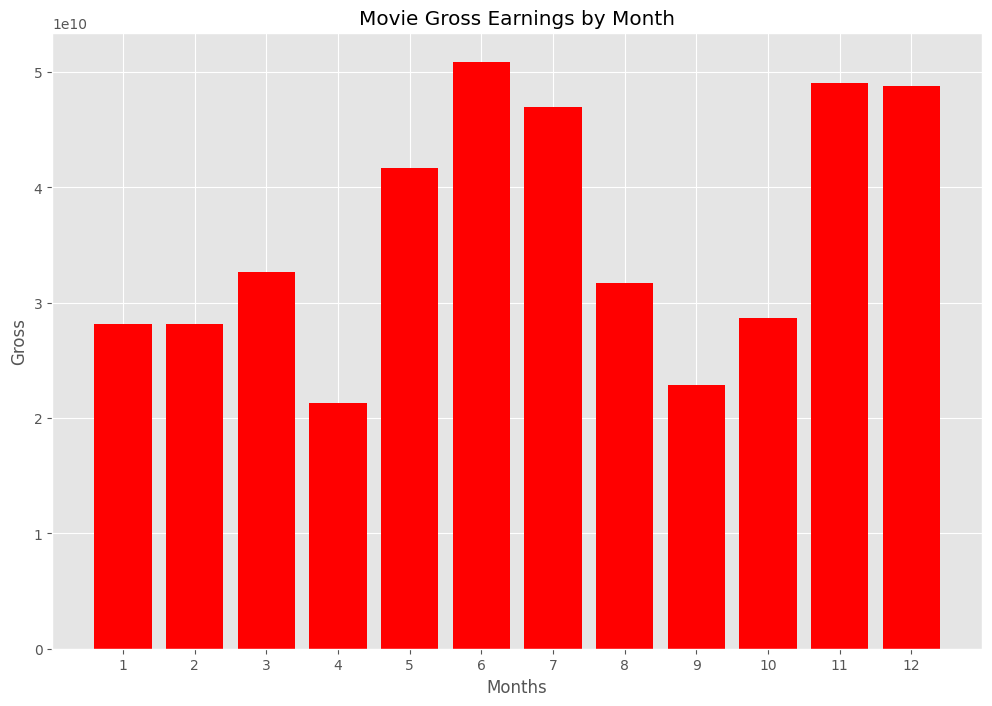

In [45]:
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['correctmonth']).sum()['gross'], color=('red'))
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

<b>Conclusion:</b> The best time of year to release a movie is June based on the overall gross earnings in this period.

### What is the ideal runtime for a movie?

#### Tabulating the data

In [46]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean()
gross_earnings_avg.sort_values()

runtime
209.0       968853.0
242.0      4770222.0
229.0      5473212.0
71.0       6582052.0
171.0      8064706.5
            ...     
151.0    422587580.5
181.0    424208848.0
183.0    449220945.0
163.0    497409852.0
187.0    562363449.0
Name: gross, Length: 124, dtype: float64

#### Visualizing the data

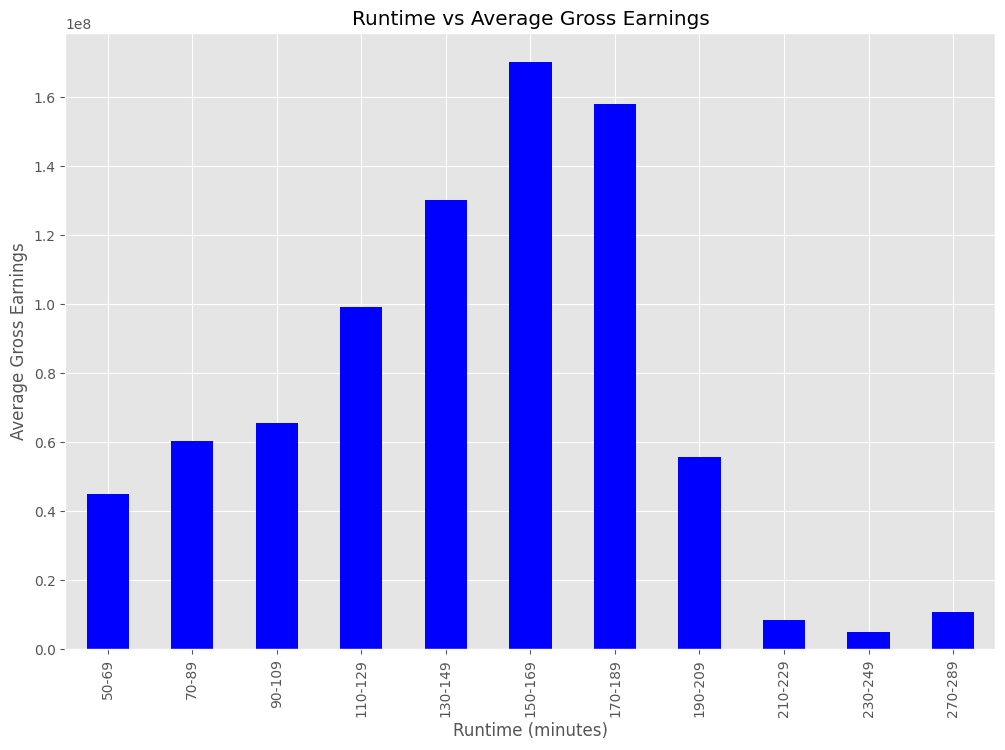

In [54]:
bins = range(50, 500, 20)
labels = [f'{b}-{b+19}' for b in bins[:-1]]
df['runtime_bin'] = pd.cut(df['runtime'], bins=bins, labels=labels, right=False)

gross_earnings_avg = df.groupby('runtime_bin',observed=True)['gross'].mean()

gross_earnings_avg.plot(kind='bar', color='blue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')
plt.show()


<b>Conclusion:</b> The ideal runtime seems to be between 150 to 170 minutes.

### What genre of movie has the most success overall? What genre of movie had the most success on average?

#### Visualizing the data

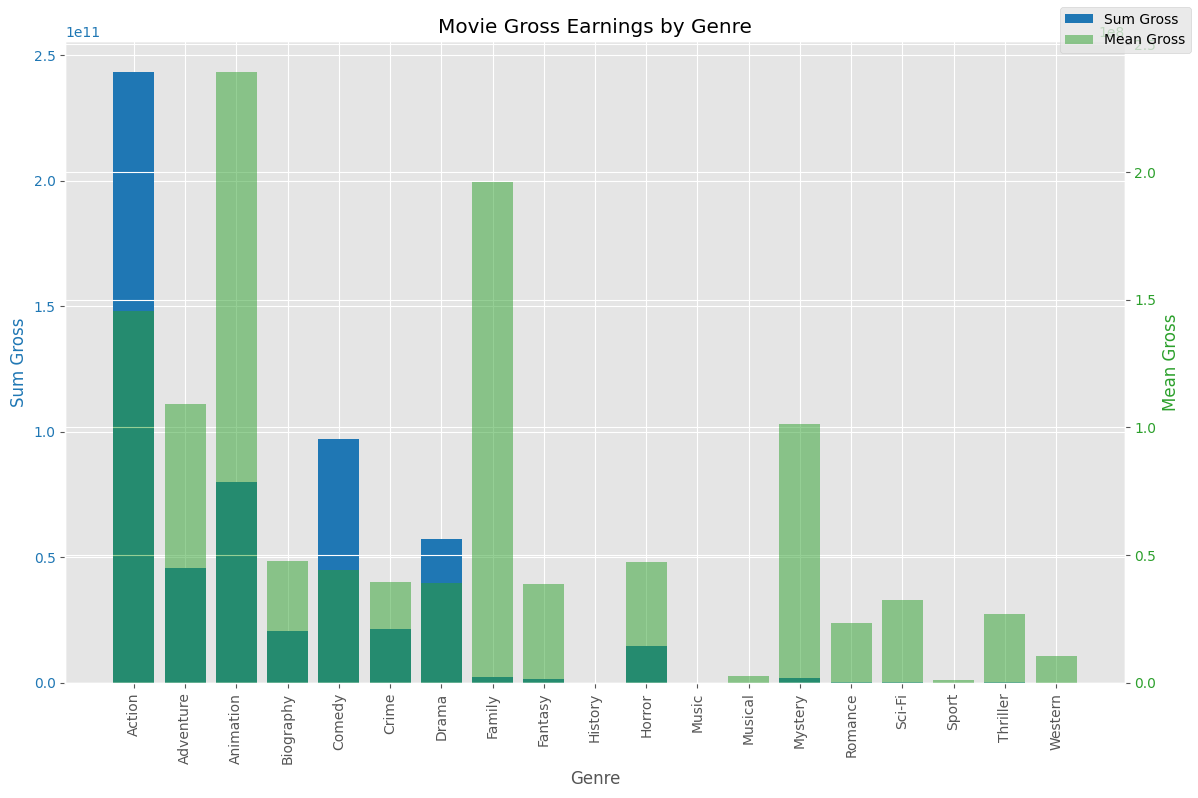

In [77]:

# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['genre'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()
sum_gross = grouped_df['sum'].tolist()
mean_gross = grouped_df['mean'].tolist()

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:green'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

<b>Conclusion:</b> The Action genre had the highest level of success across all movies, whereas the Animation genre had the highest average success rate.

## Conclusion: 

My analysis revealed that the most significant factors contributing to a movie's success were the production the movie's budget, and the votes. Additionally, certain genres, such as action and Animation, tended to be more successful than others.

Overall, my Python data analysis project provided valuable insights into the factors contributing to the success of a movie.